In [2]:
import numpy as np
import pandas as pd
import tifffile as tiff
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
%matplotlib notebook

In [5]:
from os import chdir
chdir('C:\\Users\\Peter\\Dropbox\\Colocalization methods\\zstacks')
#chdir("/Users/plinders/Dropbox/Colocalization methods/zstacks")

In [ ]:
infile = "TMEM199-myc-AF488_Sec23a-AF647_zstack1.czi_cell1.tif"

In [ ]:
sphere = "sphere.tif"

In [ ]:
with tiff.TiffFile(infile) as tif:
    images = tif.asarray()

In [ ]:
images.shape

In [ ]:
images

In [ ]:
l = {}

store = pd.DataFrame()

for i, data in enumerate(images):
    l["slice{}".format(i + 1)] = images[i]
    
for key, value in l.items():
    temp = {}
    temp['slice'] = int(key.split('slice')[1])
    for j, data in enumerate(value):
        temp["chan{}".format(j + 1)] = value[j].flatten()
    #print(temp)
    store = pd.concat([store, pd.DataFrame(temp)])
    

In [ ]:
df_filter = store.copy()
df_filter[(df_filter['chan1'] == 0) & (df_filter['chan2'] == 0)] = np.nan

In [ ]:
df_filter['chan1'].dropna().size

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs= df_filter['slice'].dropna(), ys=df_filter['chan1'].dropna(), zs = df_filter['chan2'].dropna(), alpha=0.5, depthshade=False)
ax.set_ylabel('chan1'); ax.set_xlabel('slice'); ax.set_zlabel('chan2')
ax.view_init(10, -45)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_filter.dropna().as_matrix(['slice'])
Y = df_filter.dropna().as_matrix(['chan1', 'chan2']).astype('float32')

X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

In [ ]:
x_line = np.arange(0,91).reshape(-1, 1)
p = reg.predict(x_line).T

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs = df_filter['slice'].dropna(), ys=df_filter['chan1'].dropna(), zs = df_filter['chan2'].dropna())
ax.set_ylabel('chan1'); ax.set_xlabel('slice'); ax.set_zlabel('chan2')
ax.plot(xs = x_line, ys = p[1], zs = p[0], color = 'green')
ax.view_init(10, -45)

In [ ]:
interesting_slices = ['slice20', 'slice21', 'slice22']

three_slices = dict((k, l[k]) for k in interesting_slices if k in l)

In [ ]:
small_dict = {'bla1' : np.array([[1, 2], [3, 4], [5, 6]]), 'bla2' : np.array([[7, 8], [9, 0], [1, 2]])}

In [ ]:
store = pd.DataFrame()

for key, value in small_dict.items():
    temp = {}
    temp['slice'] = key.split('bla')[1]
    for i, data in enumerate(value):
        temp["chan{}".format(i + 1)] = value[i].flatten()
    #print(temp)
    store.append(pd.DataFrame(temp))
    

In [ ]:
def imgToDataframe():
    """Function to transform all channels of open tif connection to columns in a DataFrame."""
    d = {}
    df = pd.DataFrame(columns = ["Slice", "Chan1", "Chan2", "Chan3"])
    e = {}
    for i, data in enumerate(images):
        d["{}".format(i + 1)] = images[i]
        for key, value in d.items():
            temp_df = pd.DataFrame({'Slice': key,
                                    'Chan1': d[key][0].flatten(),
                                    'Chan2': d[key][1].flatten(),
                                    'Chan3': d[key][2].flatten()})
            
            df.append(temp_df)
    return df


In [ ]:
pd.DataFrame(temp).shape

In [ ]:
df_filter.head()

In [ ]:
df_sample = df_filter.sample(n=1000)

In [ ]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
df_sample.drop(['chan3'], axis=1).iplot(kind = "surface", x = 'slice', y = 'chan1', z = 'chan2')

In [ ]:
df_sample.info()

In [ ]:
cf.datagen.sinwave(10,.25).iplot(kind='surface',theme='solar',colorscale='brbg',title='Cufflinks - Surface Plot',
                                 margin=(0,0,0,0))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs= df_sample['slice'].dropna(), ys=df_sample['chan1'].dropna(), zs = df_sample['chan2'].dropna(), alpha=0.5, depthshade=False)
ax.set_ylabel('chan1'); ax.set_xlabel('slice'); ax.set_zlabel('chan2')
ax.view_init(10, -45)

In [ ]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111)

ax.scatter(x= df_sample['slice'].dropna(), y=df_sample['chan1'].dropna())
ax.set_ylabel('chan1'); ax.set_xlabel('slice')
#ax.view_init(10, -45)

In [ ]:
with tiff.TiffFile(sphere) as tif:
    images = tif.asarray()

In [ ]:
l = {}

store = pd.DataFrame()

for i, data in enumerate(images):
    l["slice{}".format(i + 1)] = images[i]
    
for key, value in l.items():
    temp = {}
    temp['slice'] = int(key.split('slice')[1])
    for j, data in enumerate(value):
        temp["chan{}".format(j + 1)] = value[j].flatten()
    #print(temp)
    store = pd.concat([store, pd.DataFrame(temp)])

In [ ]:
df_filter = store.copy()
df_filter[(df_filter['chan1'] == 0) & (df_filter['chan2'] == 0)] = np.nan

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs= df_filter['slice'].dropna(), ys=df_filter['chan1'].dropna(), zs = df_filter['chan2'].dropna(), alpha=0.5, depthshade=False)
ax.set_ylabel('chan1'); ax.set_xlabel('slice'); ax.set_zlabel('chan2')
ax.view_init(10, -45)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_filter.dropna().as_matrix(['slice'])
Y = df_filter.dropna().as_matrix(['chan1', 'chan2']).astype('float32')

X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

In [ ]:
x_line = np.arange(0,91).reshape(-1, 1)
p = reg.predict(x_line).T

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs = df_filter['slice'].dropna(), ys=df_filter['chan1'].dropna(), zs = df_filter['chan2'].dropna())
ax.set_ylabel('chan1'); ax.set_xlabel('slice'); ax.set_zlabel('chan2')
ax.plot(xs = x_line, ys = p[1], zs = p[0], color = 'green')
ax.view_init(10, -45)

In [6]:
def stackLoader(input_file):
    with tiff.TiffFile(input_file) as tif:
        images = tif.asarray()

    l = {}

    store = pd.DataFrame()

    for i, data in enumerate(images):
        l["slice{}".format(i + 1)] = images[i]

    for key, value in l.items():
        temp = {}
        temp['slice'] = int(key.split('slice')[1])
        for j, data in enumerate(value):
            temp["chan{}".format(j + 1)] = value[j].flatten()
        #print(temp)
        store = pd.concat([store, pd.DataFrame(temp)])
        
    return(store)

In [7]:
sphere_surface = stackLoader("sphere_corners_random.tif")
df_filter = sphere_surface.copy()
df_filter[(df_filter['chan1'] == 0) & (df_filter['chan2'] == 0)] = np.nan

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs= df_filter['slice'].dropna(), ys=df_filter['chan1'].dropna(), zs = df_filter['chan2'].dropna(), alpha=0.5, depthshade=False)
ax.set_ylabel('chan1'); ax.set_xlabel('slice'); ax.set_zlabel('chan2')
ax.view_init(10, -45)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_filter.dropna().as_matrix(['slice'])
Y = df_filter.dropna().as_matrix(['chan1', 'chan2']).astype('float32')

X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

In [ ]:
x_line = np.arange(0,91).reshape(-1, 1)
p = reg.predict(x_line).T

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs = df_filter['slice'].dropna(), ys=df_filter['chan1'].dropna(), zs = df_filter['chan2'].dropna(), alpha=0.5, depthshade=False)
ax.set_ylabel('chan1'); ax.set_xlabel('slice'); ax.set_zlabel('chan2')
ax.plot(xs = x_line, ys = p[1], zs = p[0], color = 'green')
ax.view_init(10, -45)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.contourf(X = df_filter['slice'].dropna(), Y=df_filter['chan1'].dropna(), Z = df_filter['chan2'].dropna())

In [8]:
from mayavi import mlab
mlab.init_notebook()

In [12]:
pts = mlab.points3d(df_filter['chan1'].dropna(), df_filter['chan2'].dropna(), df_filter['slice'].dropna())

In [15]:
pts = mlab.points3d(df_sample['chan1'].dropna(), df_sample['chan2'].dropna(), df_sample['slice'].dropna())
mesh = mlab.pipeline.delaunay2d(pts)
pts.remove()
mlab.pipeline.surface(mesh)

#mlab.show()

KeyboardInterrupt: 

In [14]:
df_sample = df_filter.sample(frac=0.05)

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from scipy.spatial import Delaunay

#x = df_sample['chan1'].dropna()
#y = df_sample['chan2'].dropna()
z = df_sample['slice'].dropna()

x,y = np.meshgrid(np.array([df_sample['chan1'].dropna(), df_sample['chan2'].dropna()]))

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_trisurf(x, y, z, triangles = tri.simplices, cmap=plt.cm.Spectral)

ValueError: need more than 1 value to unpack

<IPython.core.display.Javascript object>


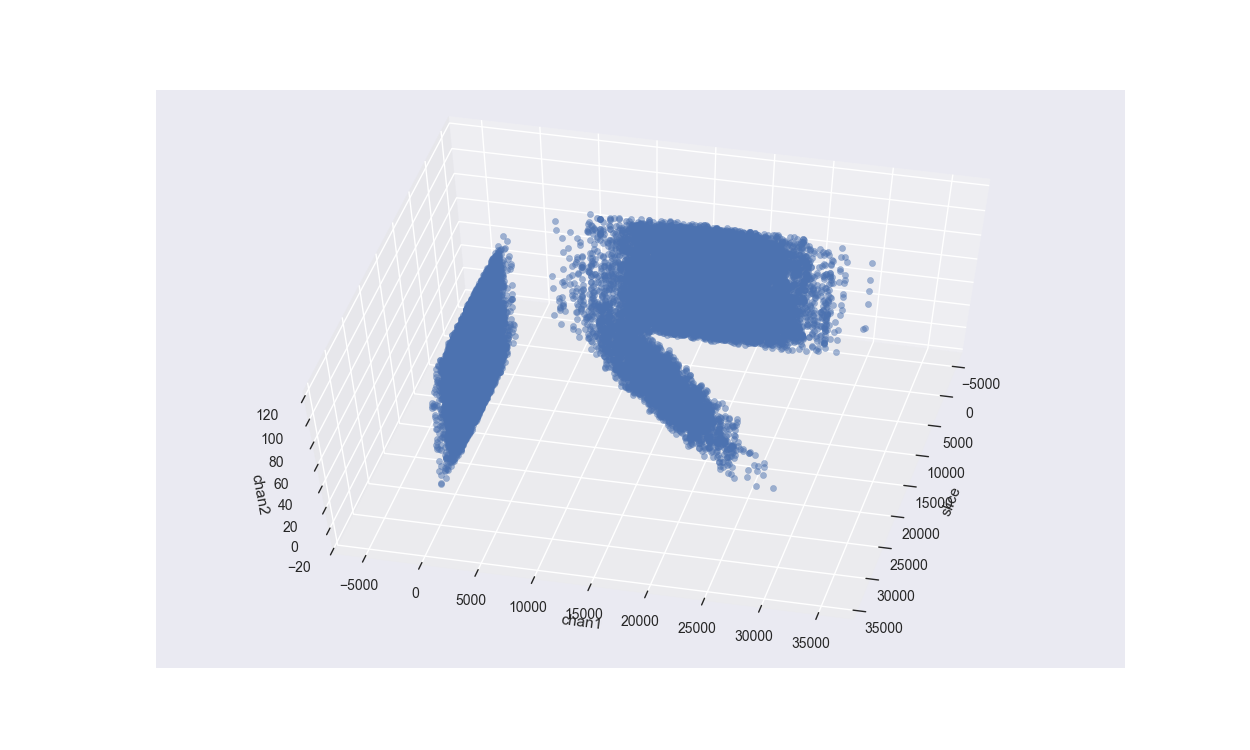

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(zs= df_sample['slice'].dropna(), xs=df_sample['chan1'].dropna(), ys = df_sample['chan2'].dropna(), alpha=0.5, depthshade=False, cmap=plt.cm.Spectral)
ax.set_ylabel('chan1'); ax.set_xlabel('slice'); ax.set_zlabel('chan2')
ax.view_init(10, -45)

In [10]:
df_sample.min()

chan1    0.0
chan2    0.0
slice    2.0
dtype: float64

In [13]:
def f(x, y):
       return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [15]:
plt.contourf(x = df_sample['chan1'].dropna(), y = df_sample['chan2'].dropna(), z = f(df_sample['chan1'].dropna(), df_sample['chan2'].dropna()), cmap='RdGy')

TypeError: contourf() takes at least 4 arguments (1 given)

In [18]:
X, Y = np.meshgrid(df_sample['chan1'].dropna(), df_sample['chan2'].dropna())
Z = f(X, Y)

MemoryError: 

<IPython.core.display.Javascript object>


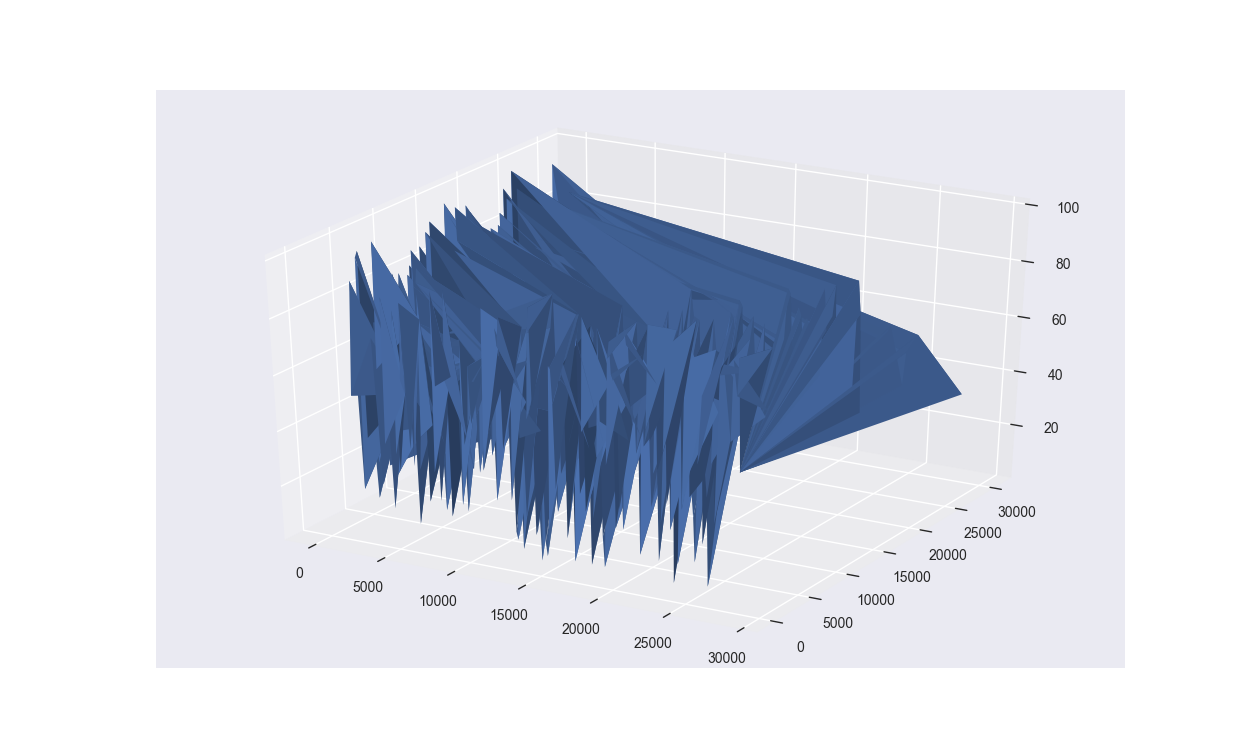

In [30]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection = '3d')

ax.plot_trisurf(df_sample['chan1'].dropna(), df_sample['chan2'].dropna(), df_sample['slice'].dropna())